In [80]:
import os

# Third-party
from astropy.io import ascii
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('apw-notebook')
%matplotlib inline
import h5py

from keras.models import model_from_json

In [2]:
with open("../data/model.json", "r") as f:
    model = model_from_json(f.read())

In [3]:
model.load_weights('../data/weights.h5')

In [55]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_10 (Convolution1D) (None, None, 128)     4224        convolution1d_input_1[0][0]      
____________________________________________________________________________________________________
activation_10 (Activation)       (None, None, 128)     0           convolution1d_10[0][0]           
____________________________________________________________________________________________________
maxpooling1d_10 (MaxPooling1D)   (None, None, 128)     0           activation_10[0][0]              
____________________________________________________________________________________________________
convolution1d_11 (Convolution1D) (None, None, 128)     262272      maxpooling1d_10[0][0]            
___________________________________________________________________________________________

In [93]:
convout1 = model.layers[1]

Load the APOGEE data used to train the network

In [83]:
with h5py.File('../data/apogee-spectra.h5', 'r') as f:
    X = f['X'][:]
    y = f['y'][:]
    filenames = f['filenames'][:]
    
X[np.isnan(X)] = 0.

Metadata for the spectra

In [87]:
# contains the label information
meta_tbl = ascii.read("../data/training_dr13e2_large_cleaner_H_fix_lower_dr13.list")
meta_tbl.rename_column('col1', 'url')
meta_tbl.rename_column('col2', 'Teff')
meta_tbl.rename_column('col3', 'logg')
meta_tbl.rename_column('col4', '[Fe/H]')
meta_tbl.rename_column('col5', '[alpha/Fe]')
meta_tbl['filename'] = [os.path.basename(x) for x in meta_tbl['url']]

meta_tbl = meta_tbl[:X.shape[0]]

In [94]:
convout1_f = theano.function(model.inputs, [convout1.output])

Sort by Teff, make plot of activations in order?!

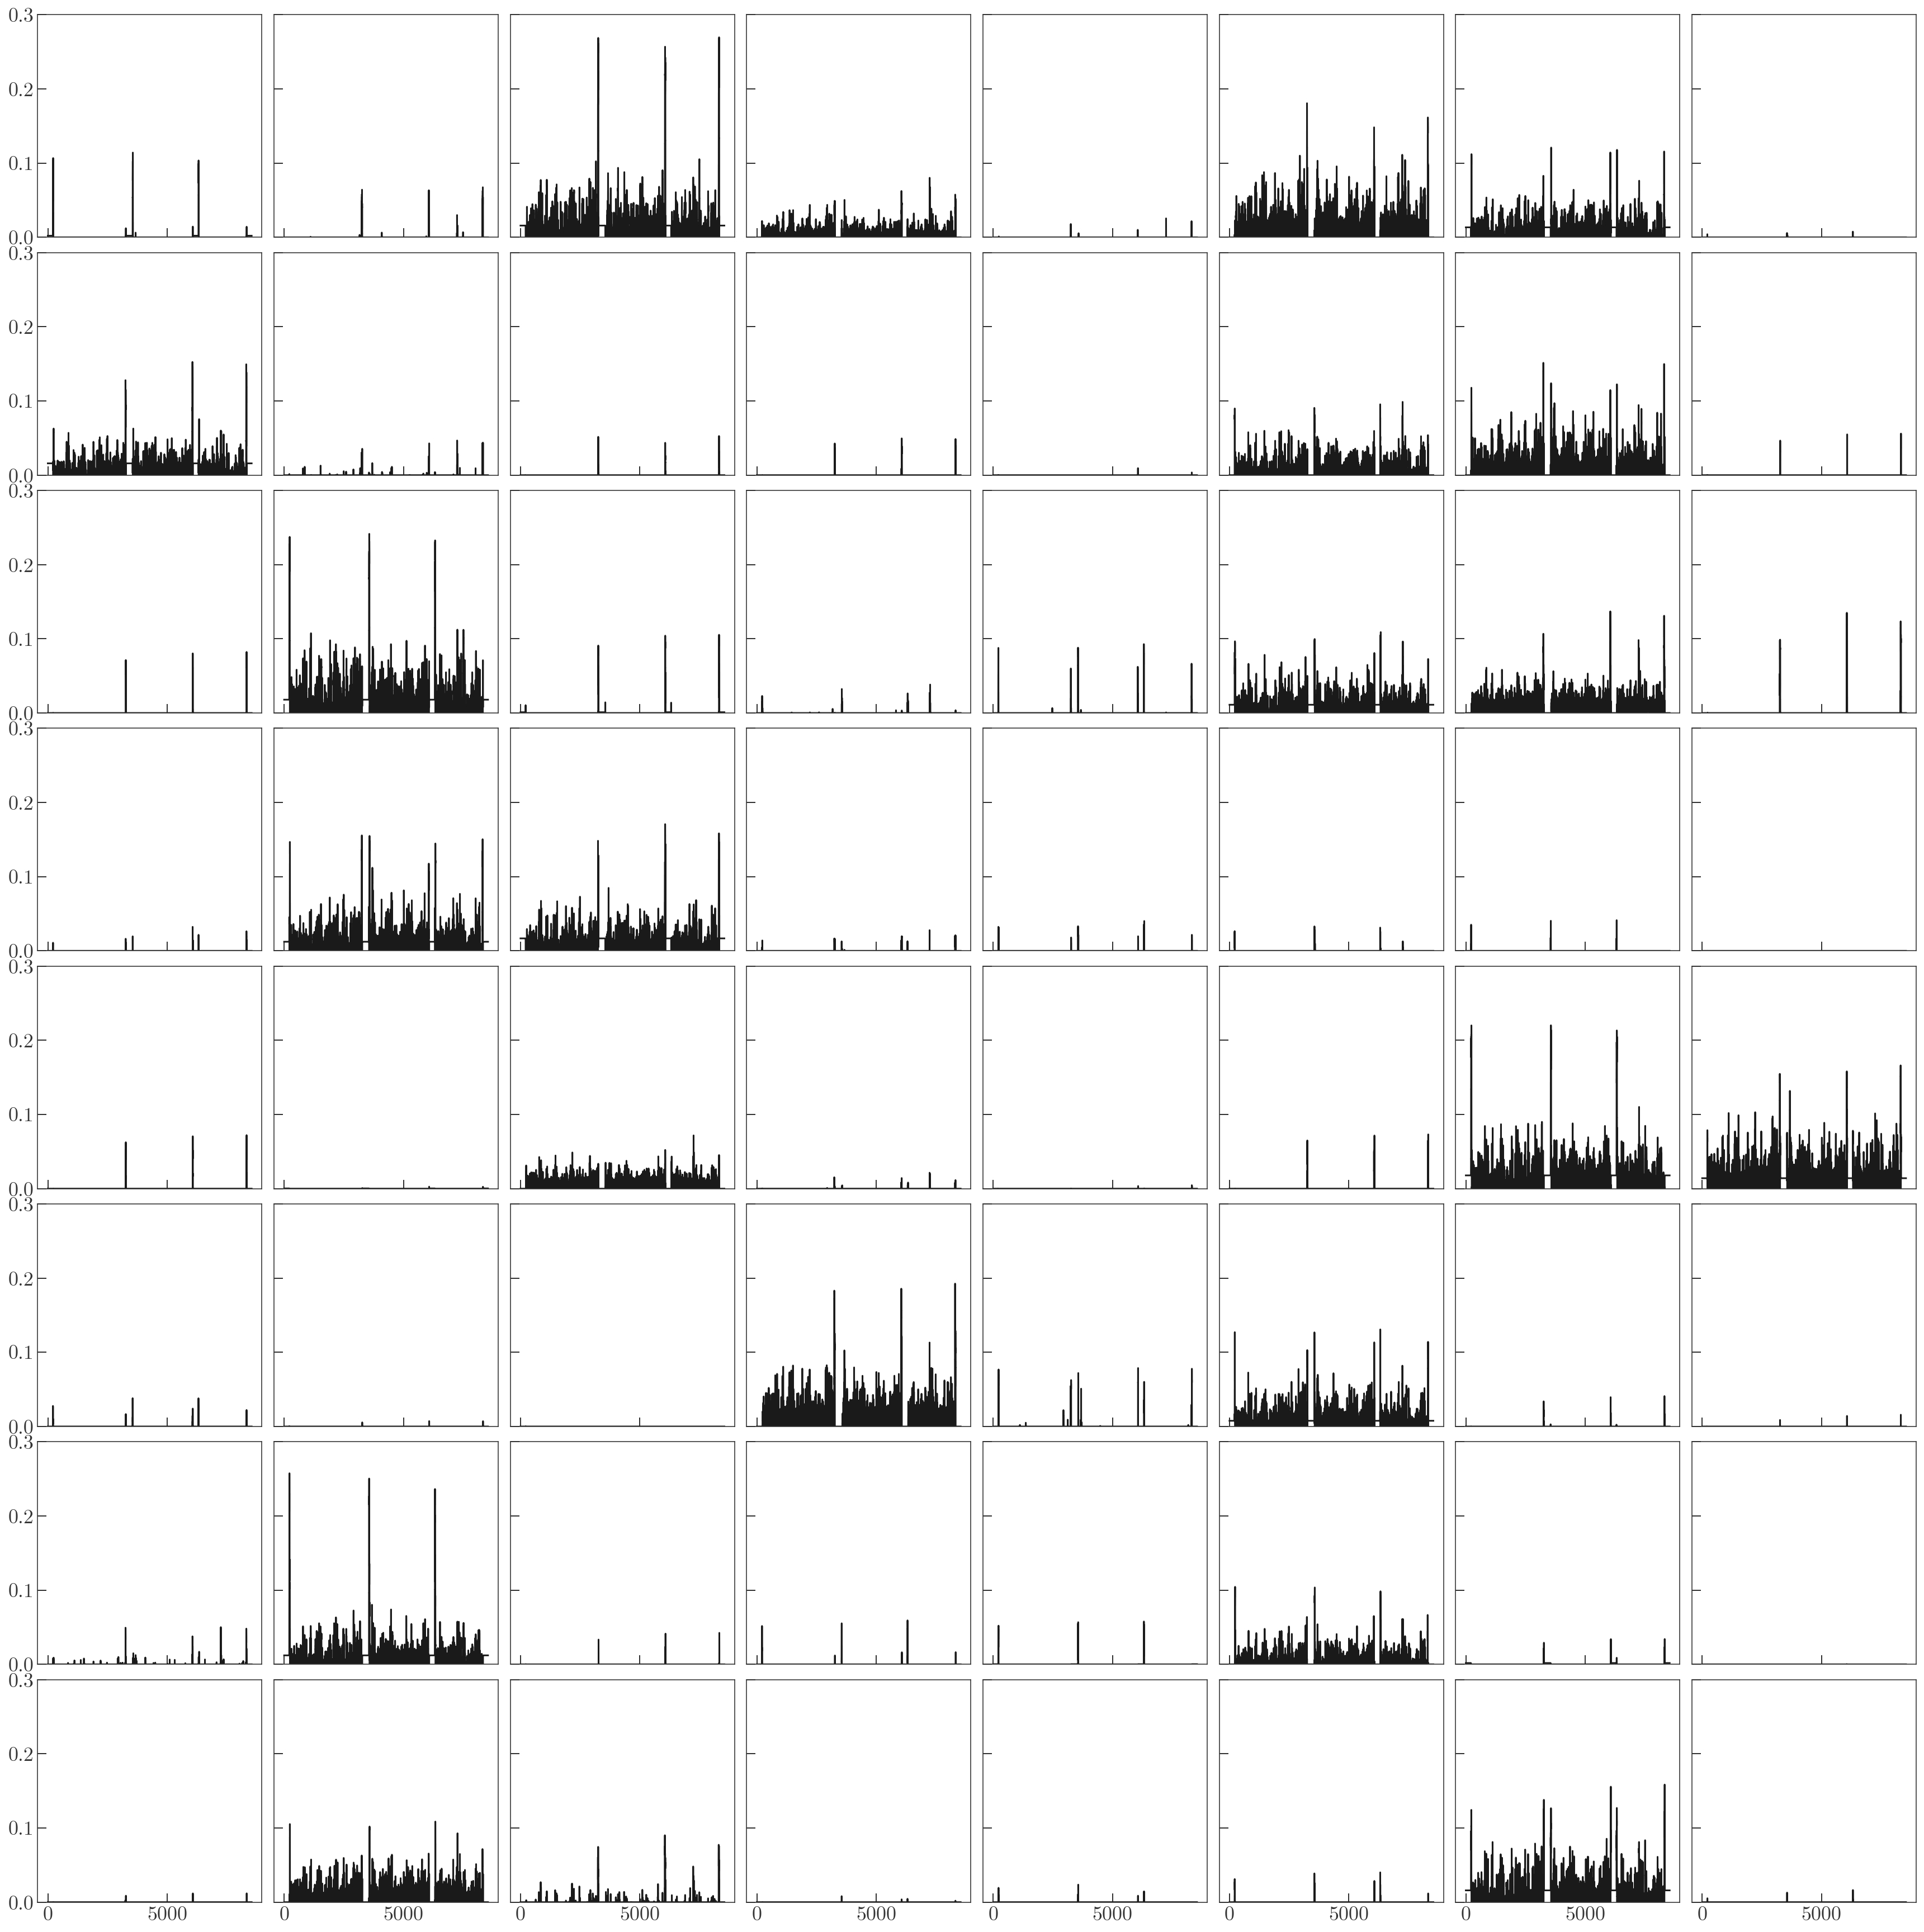

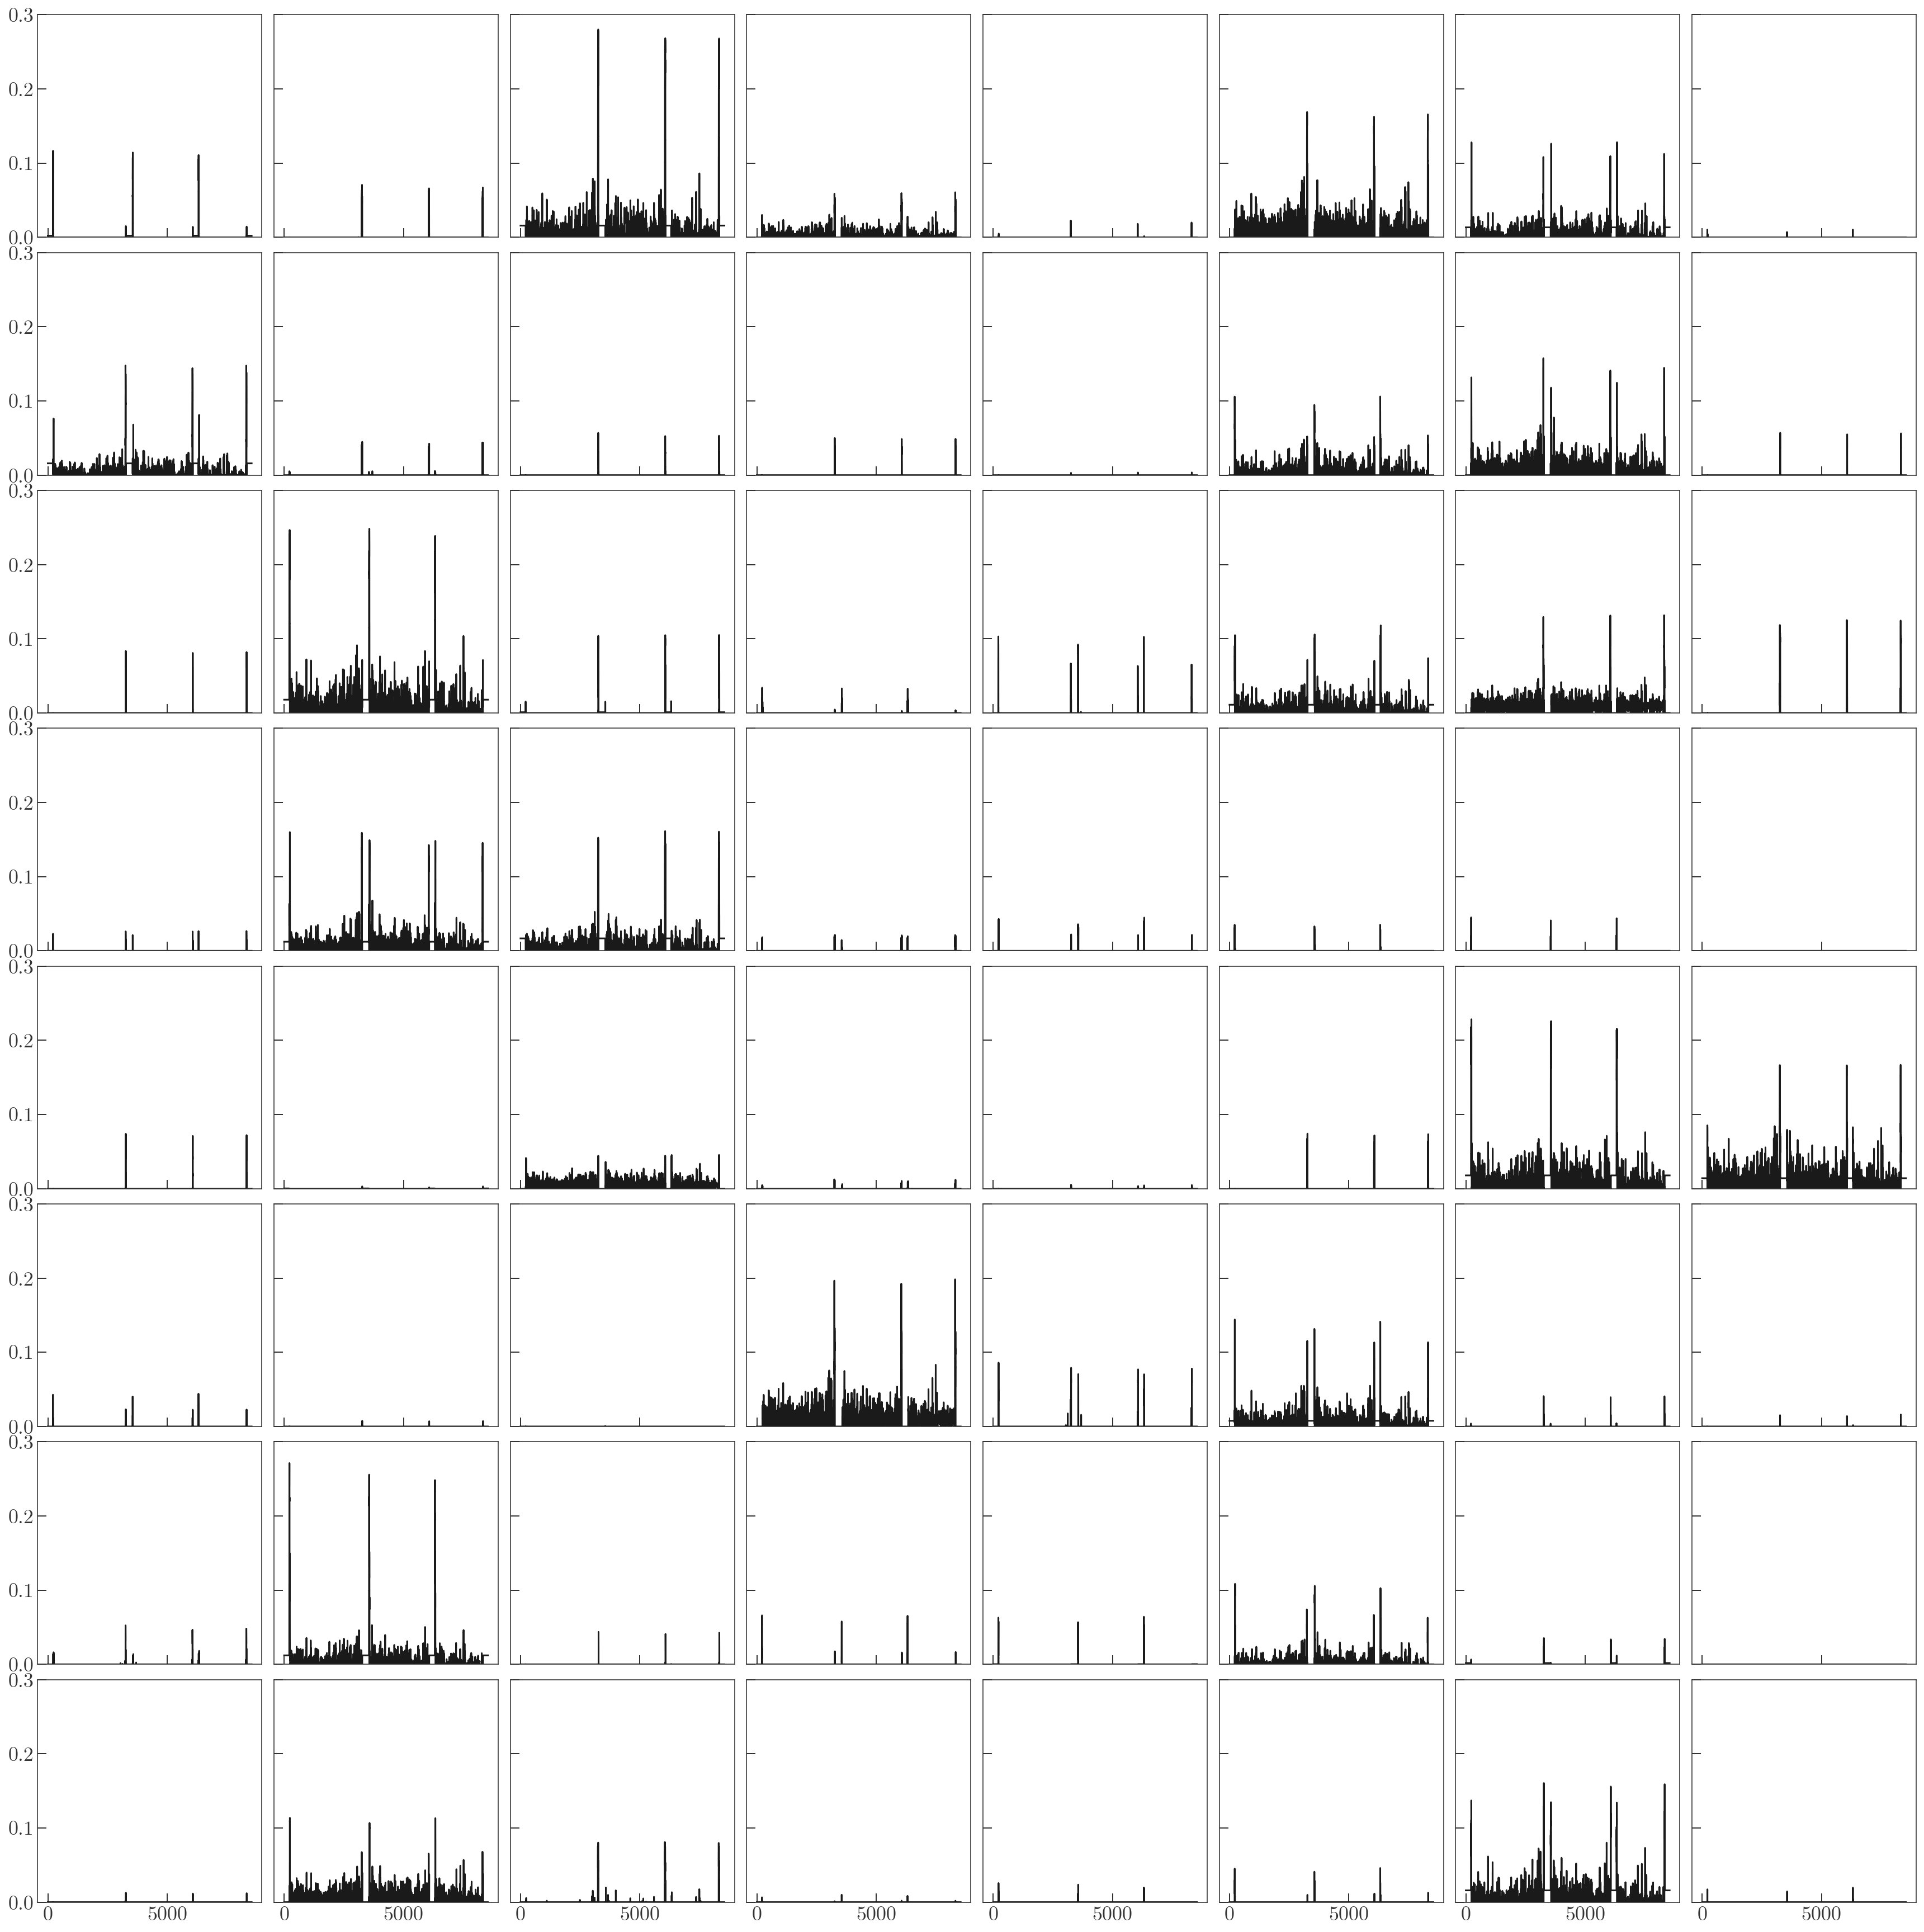

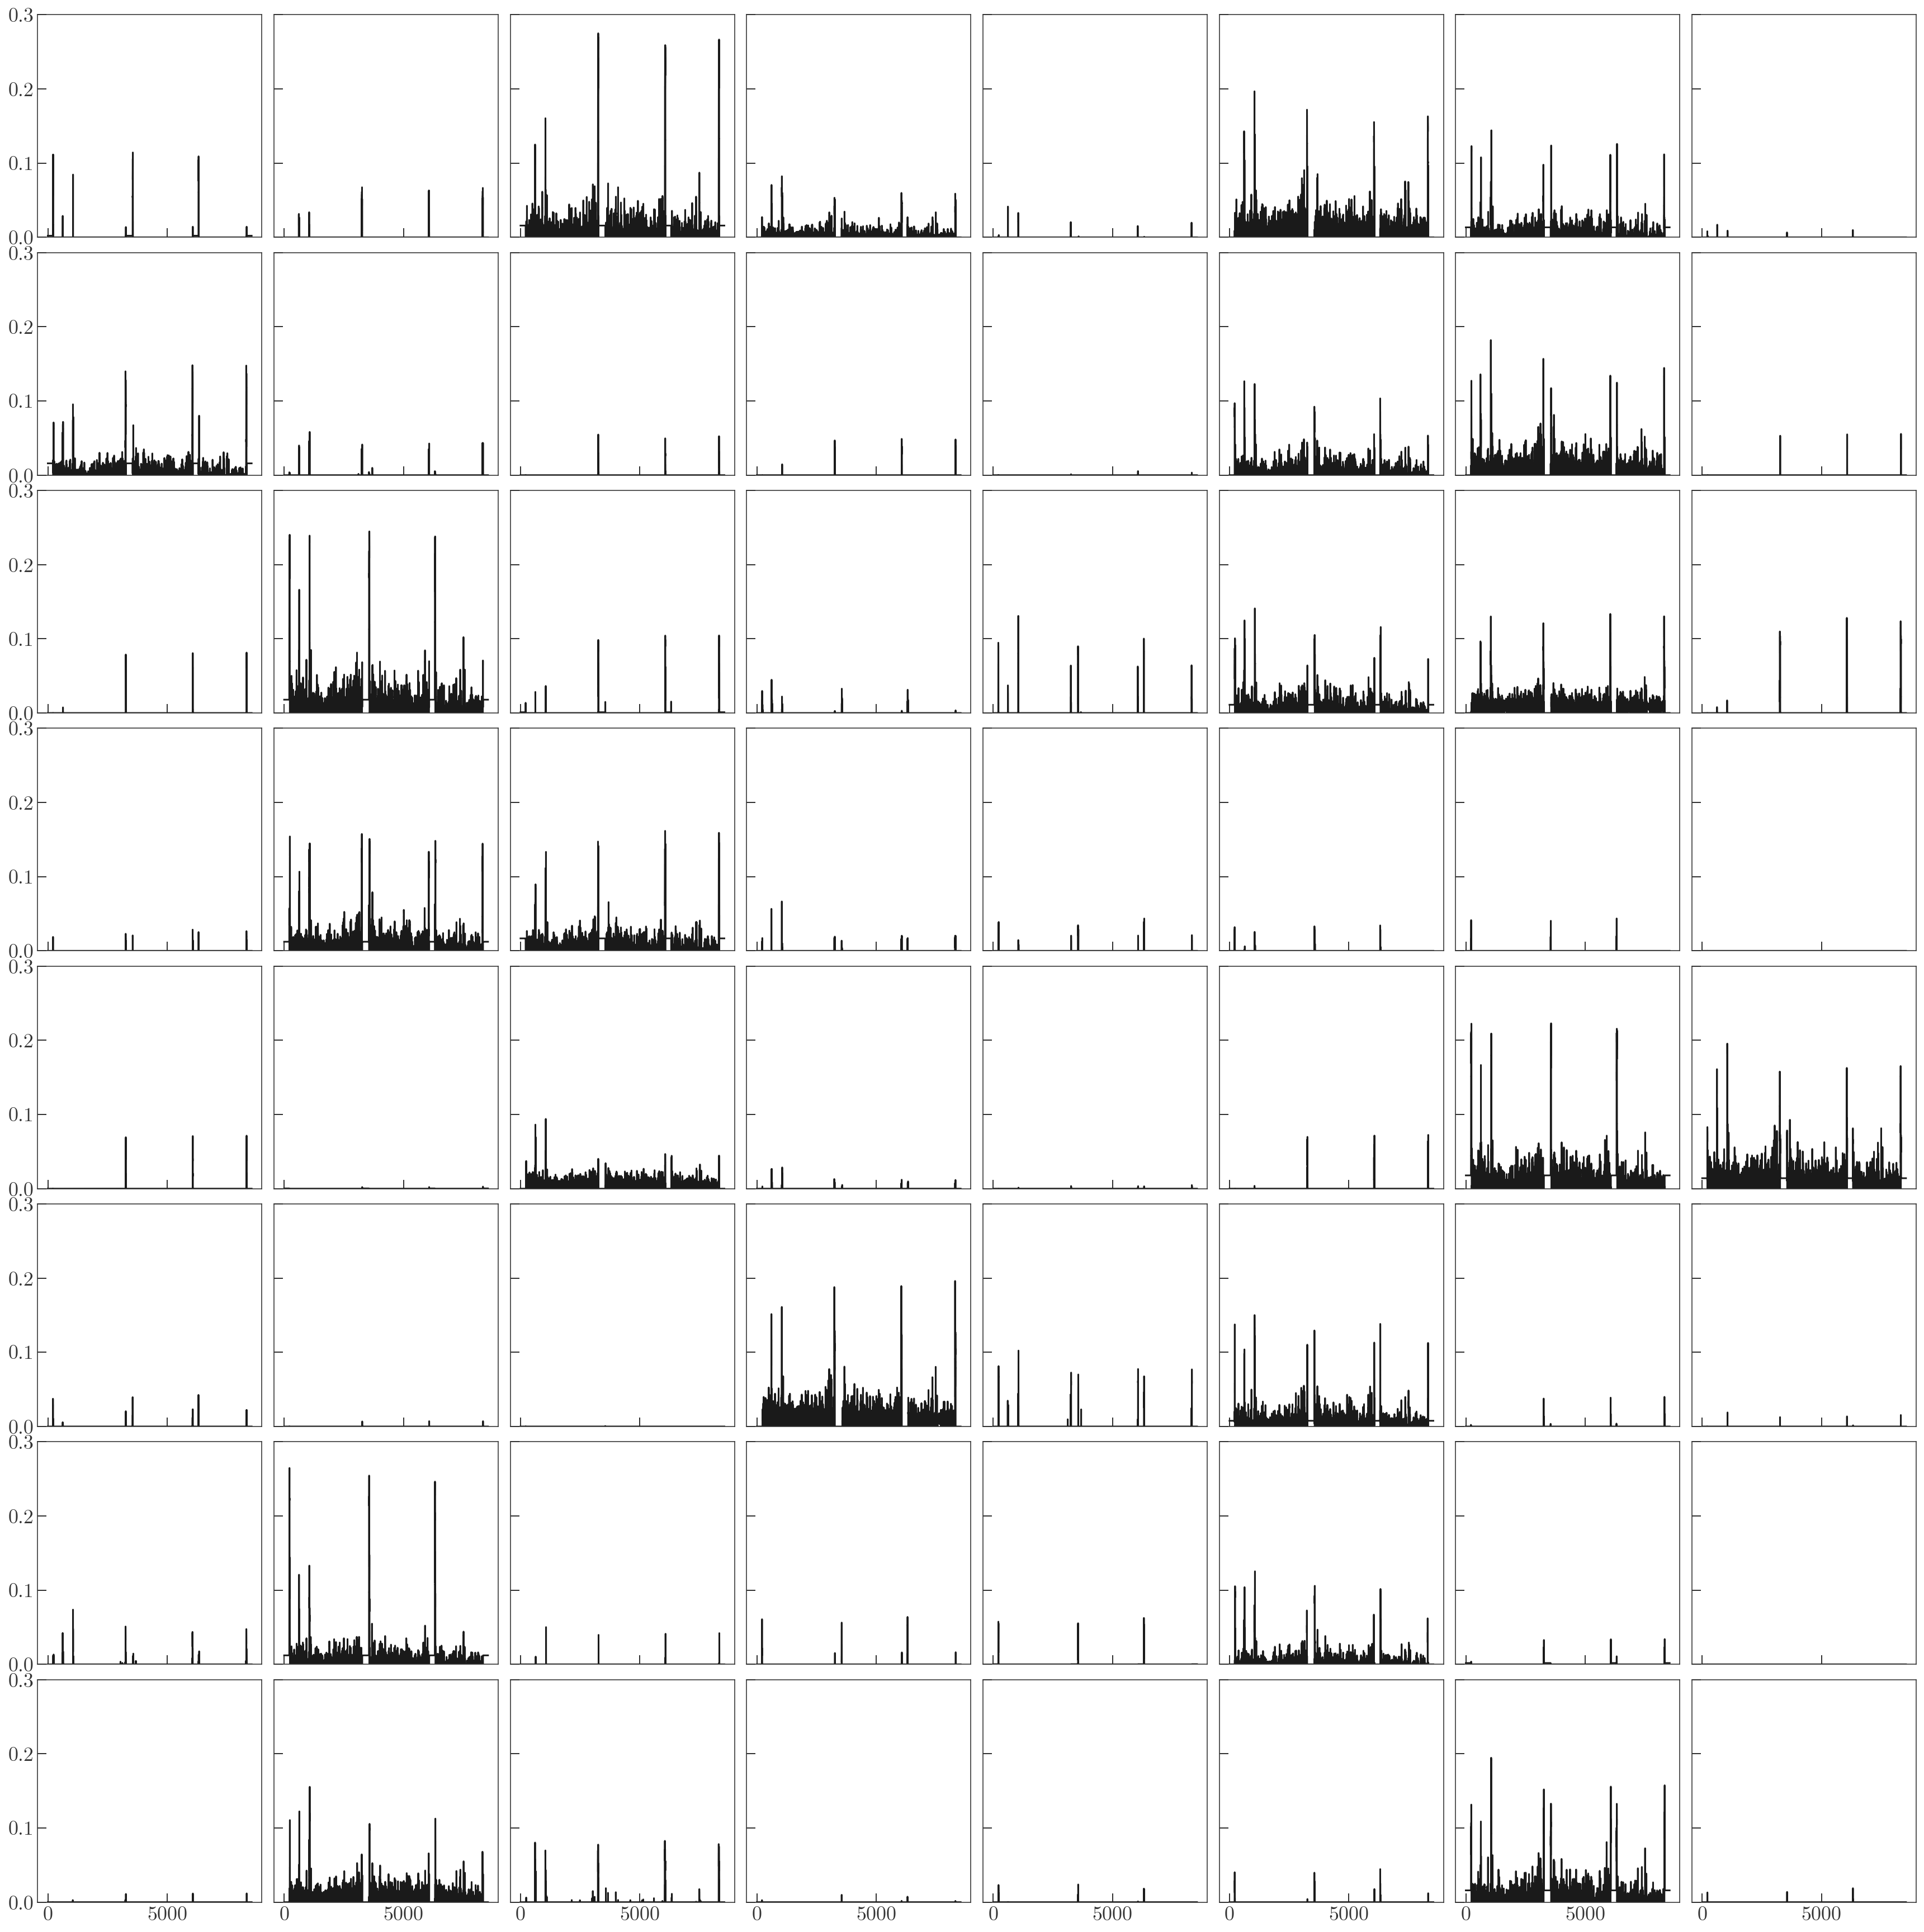

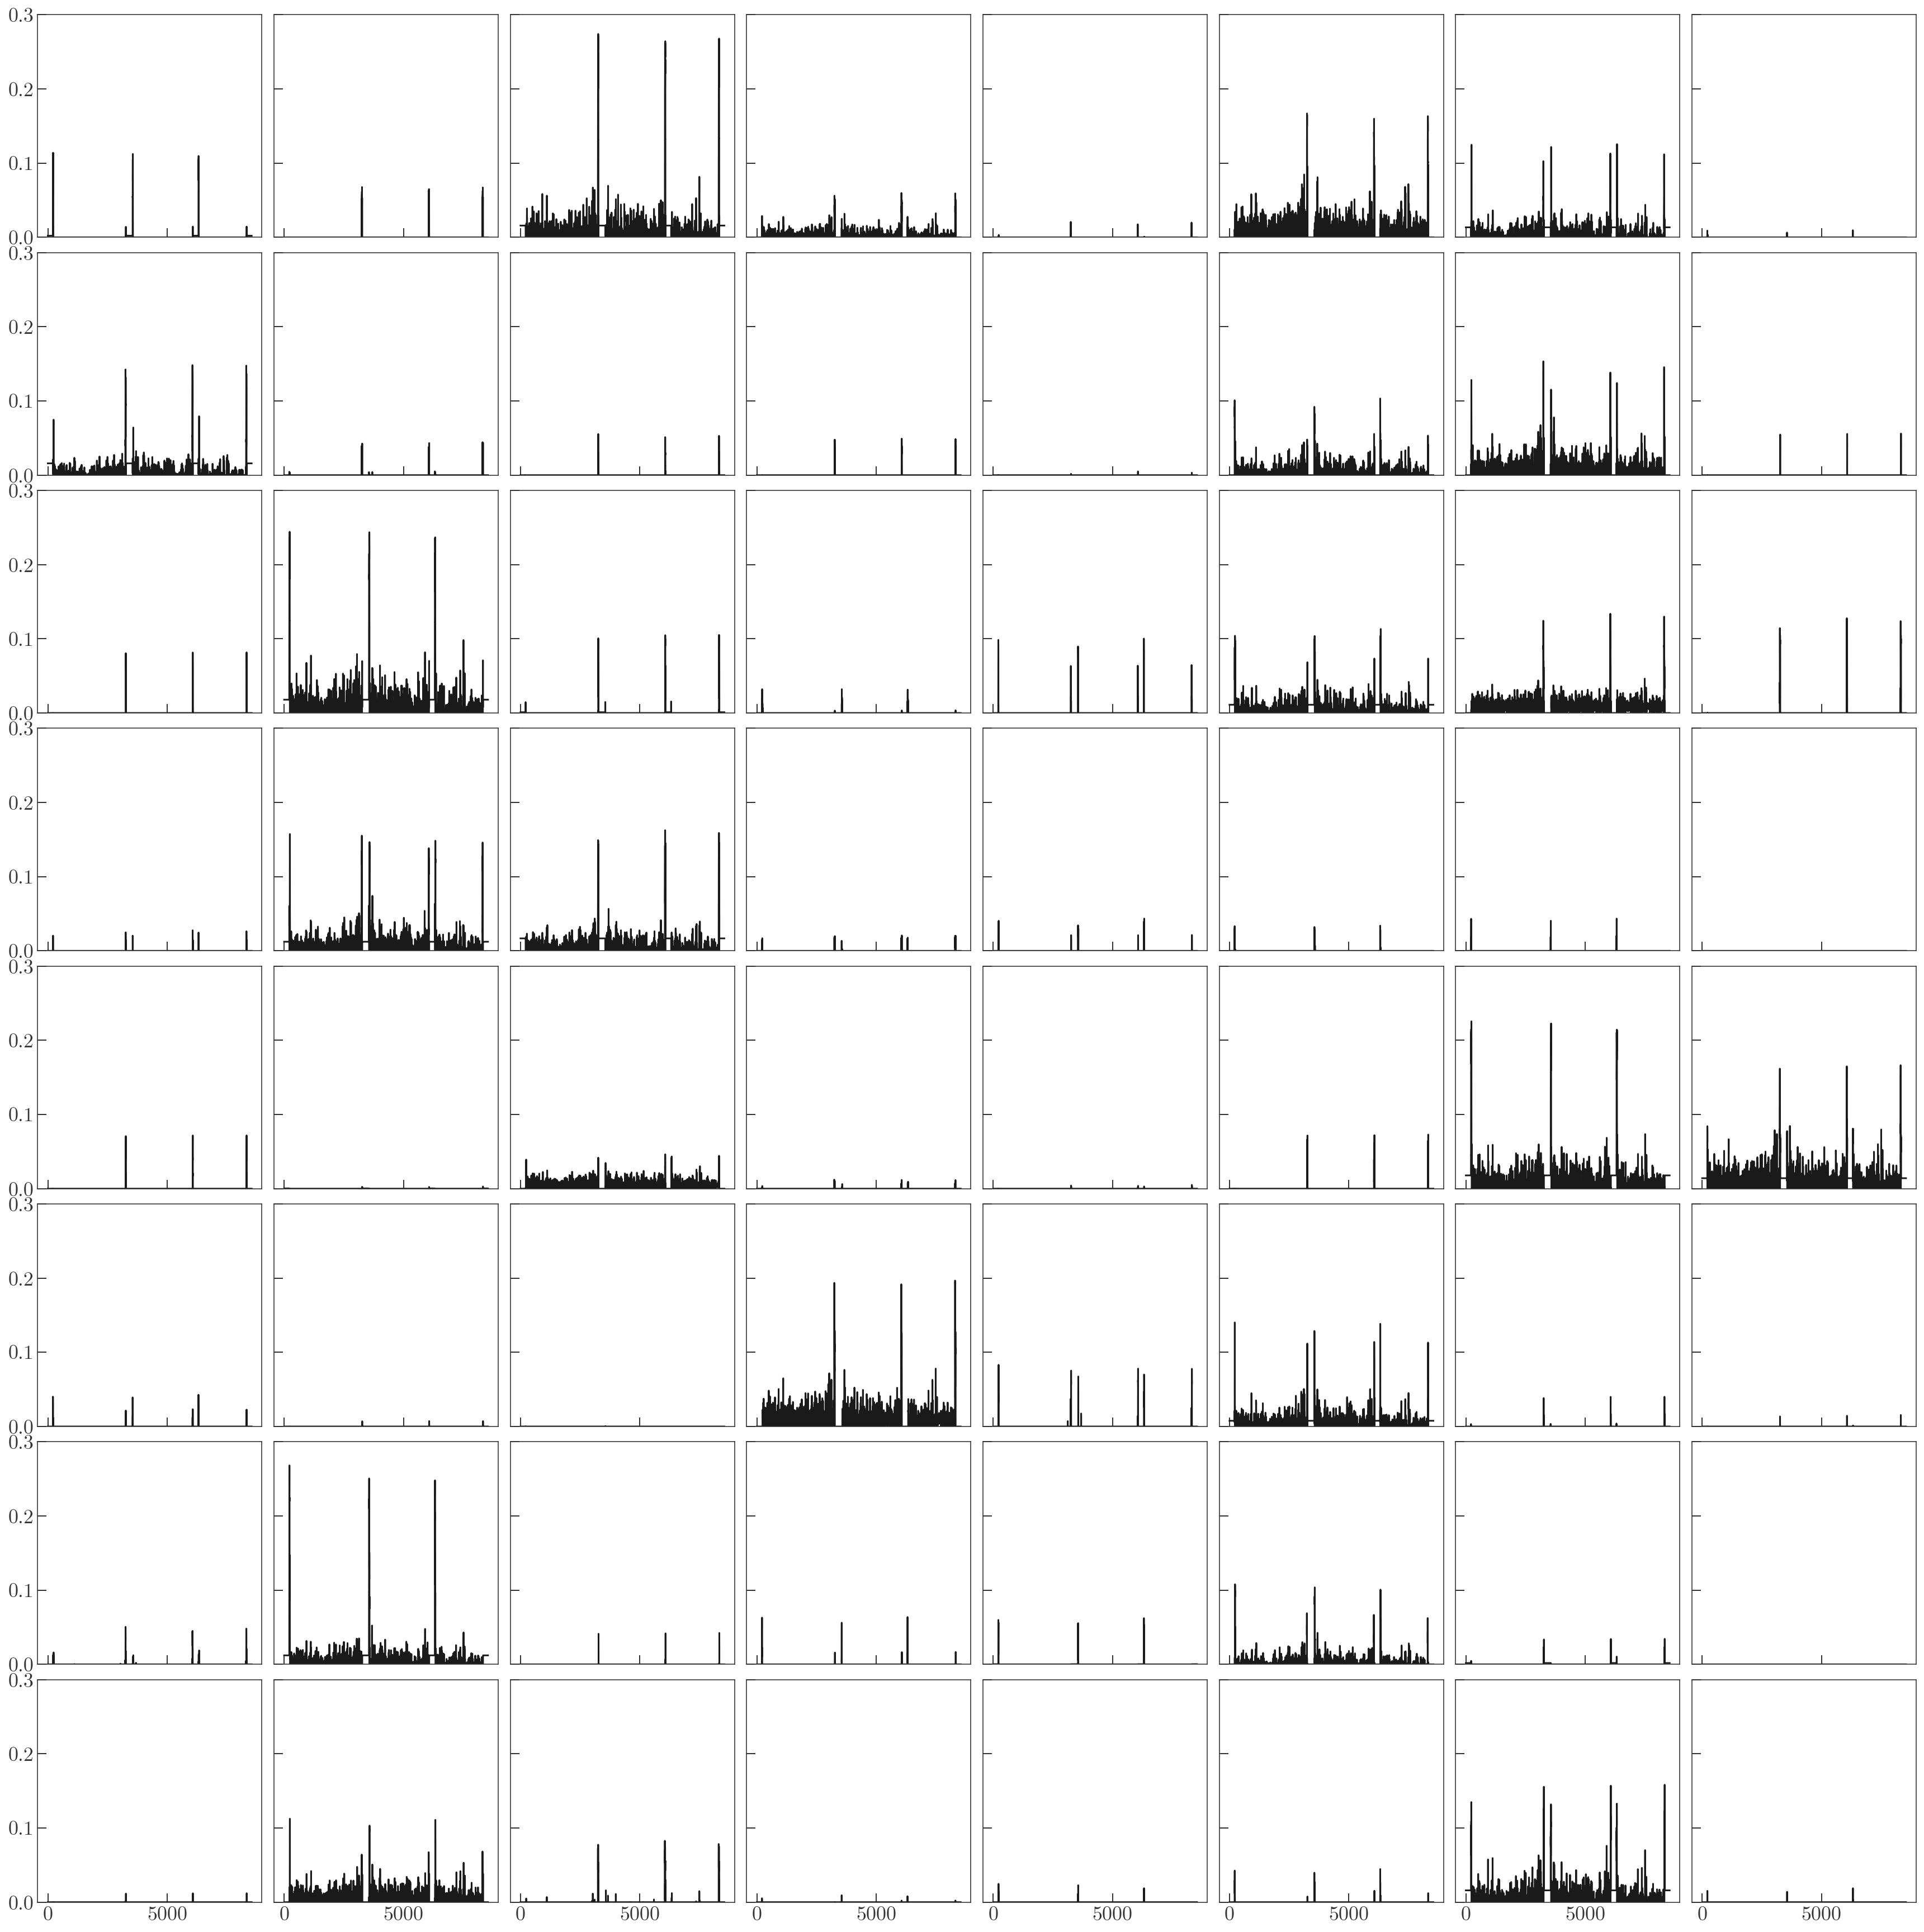

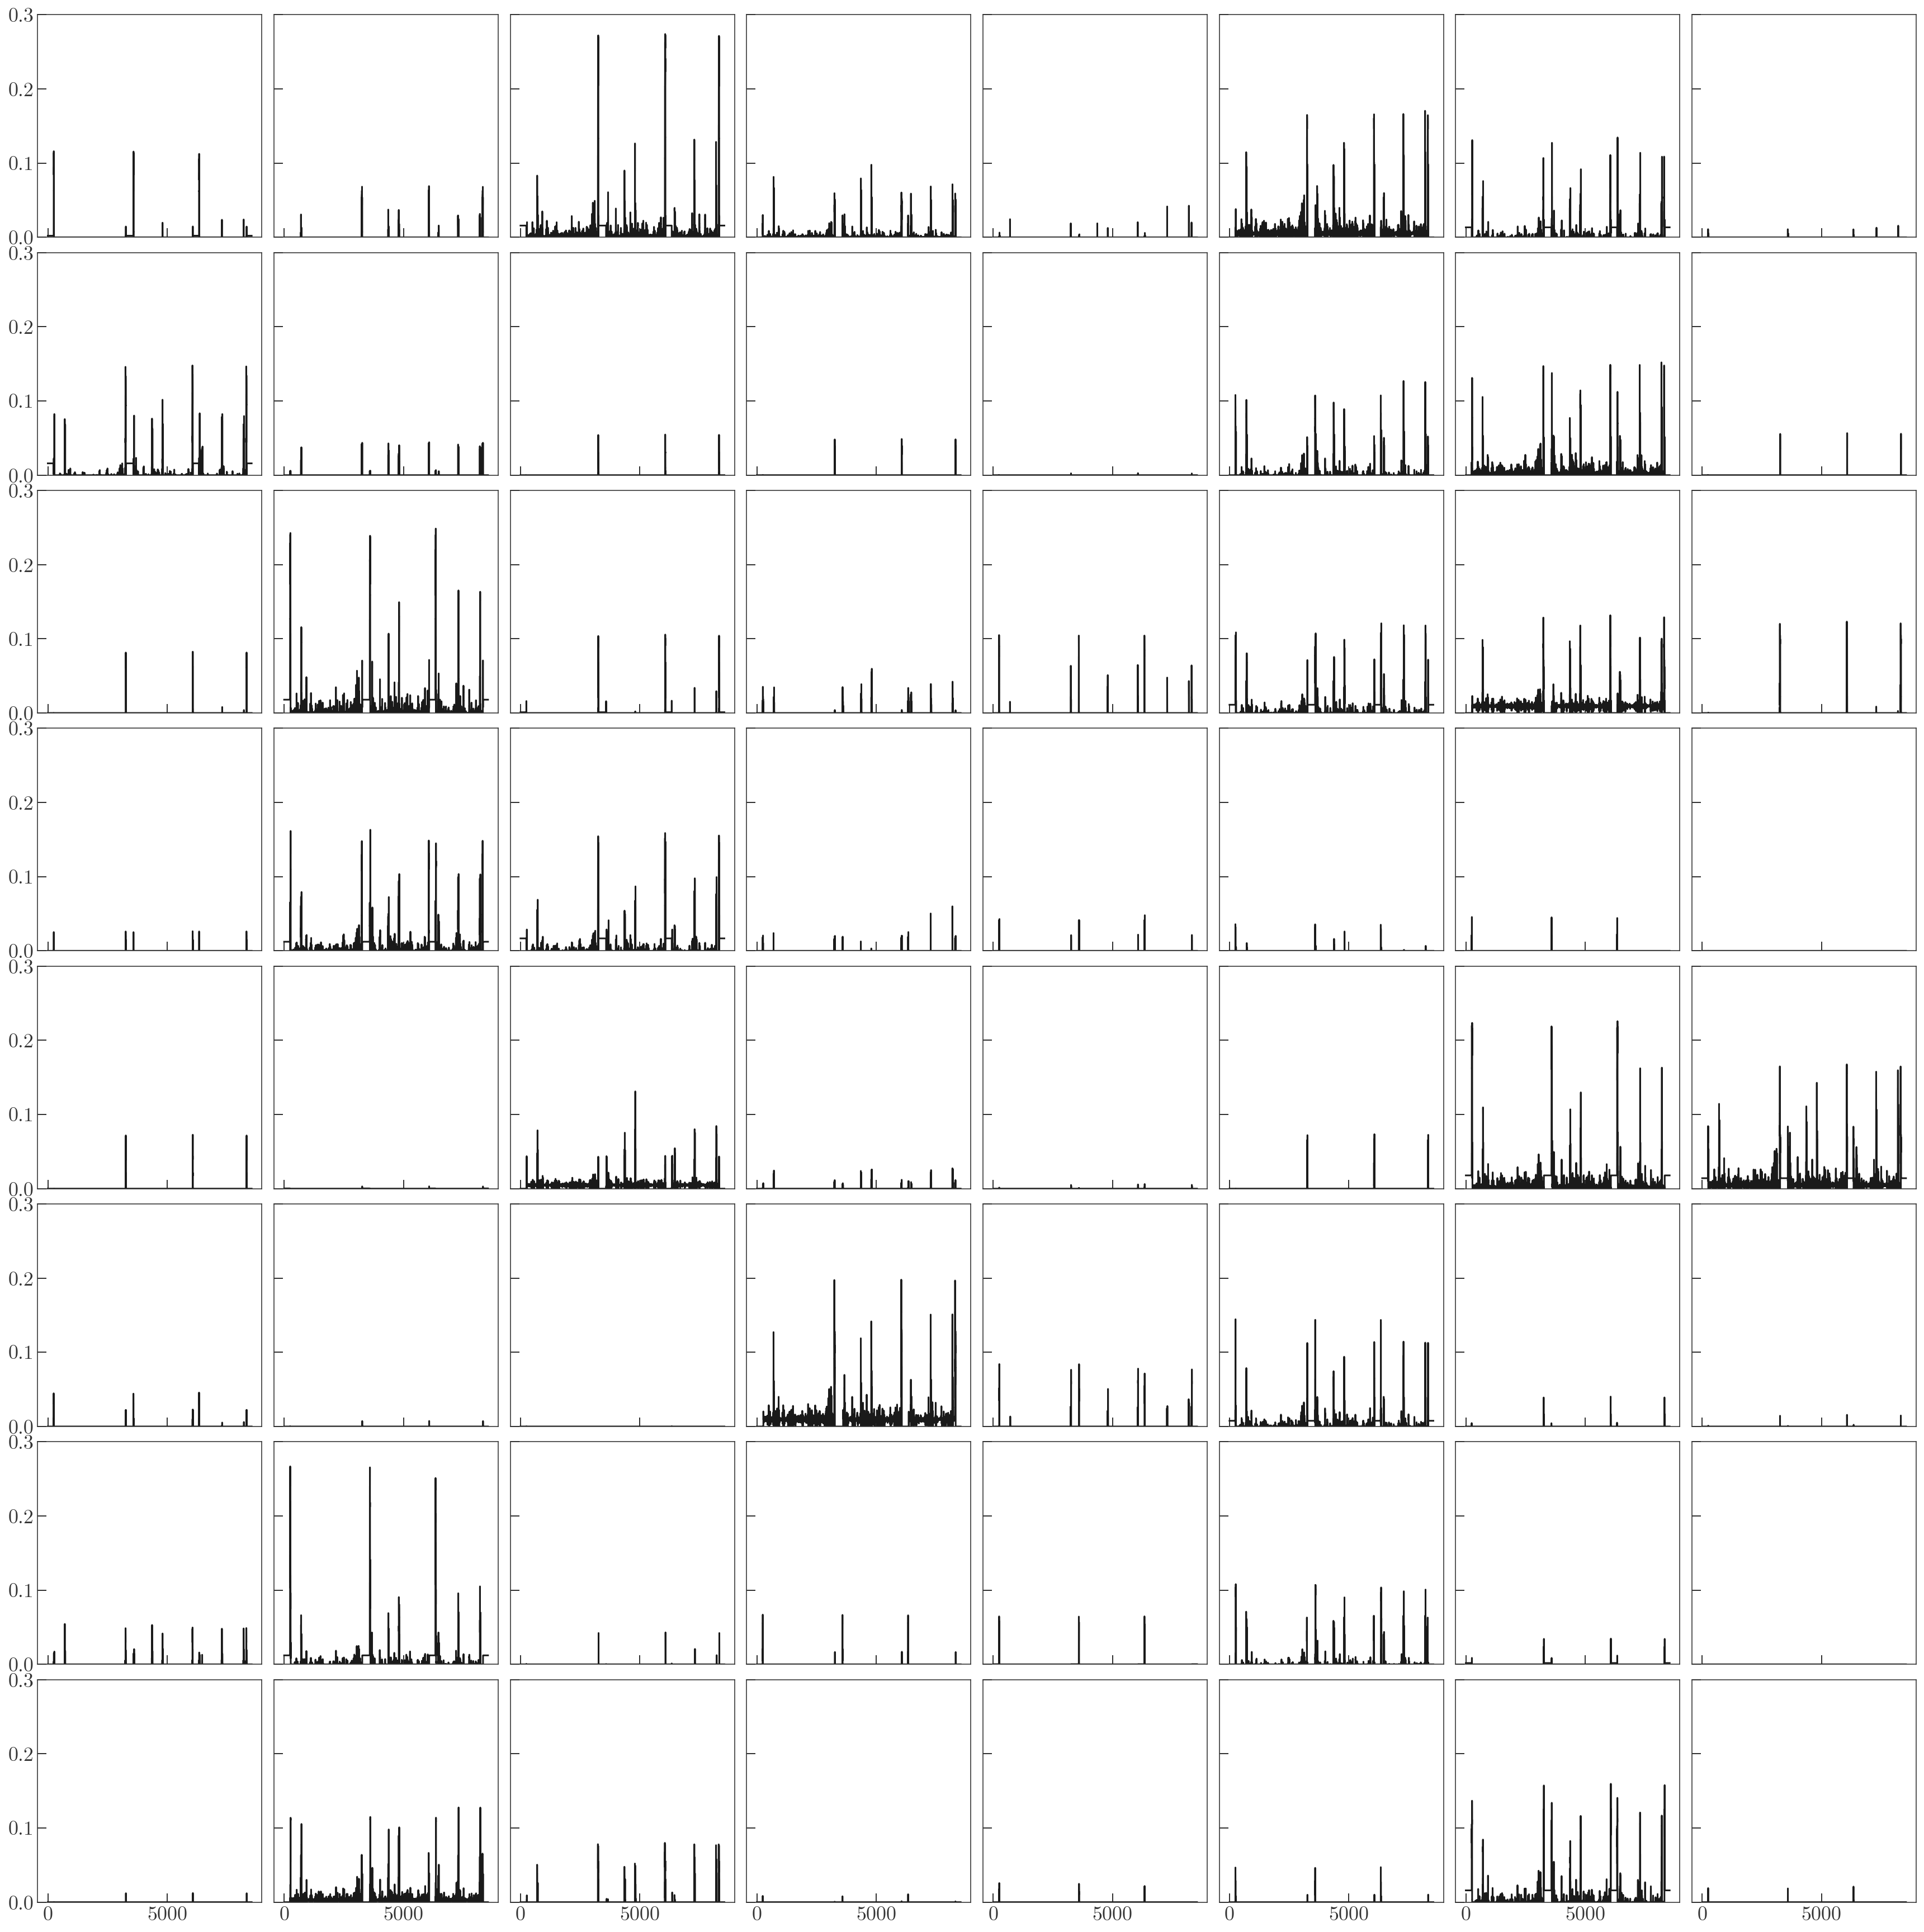

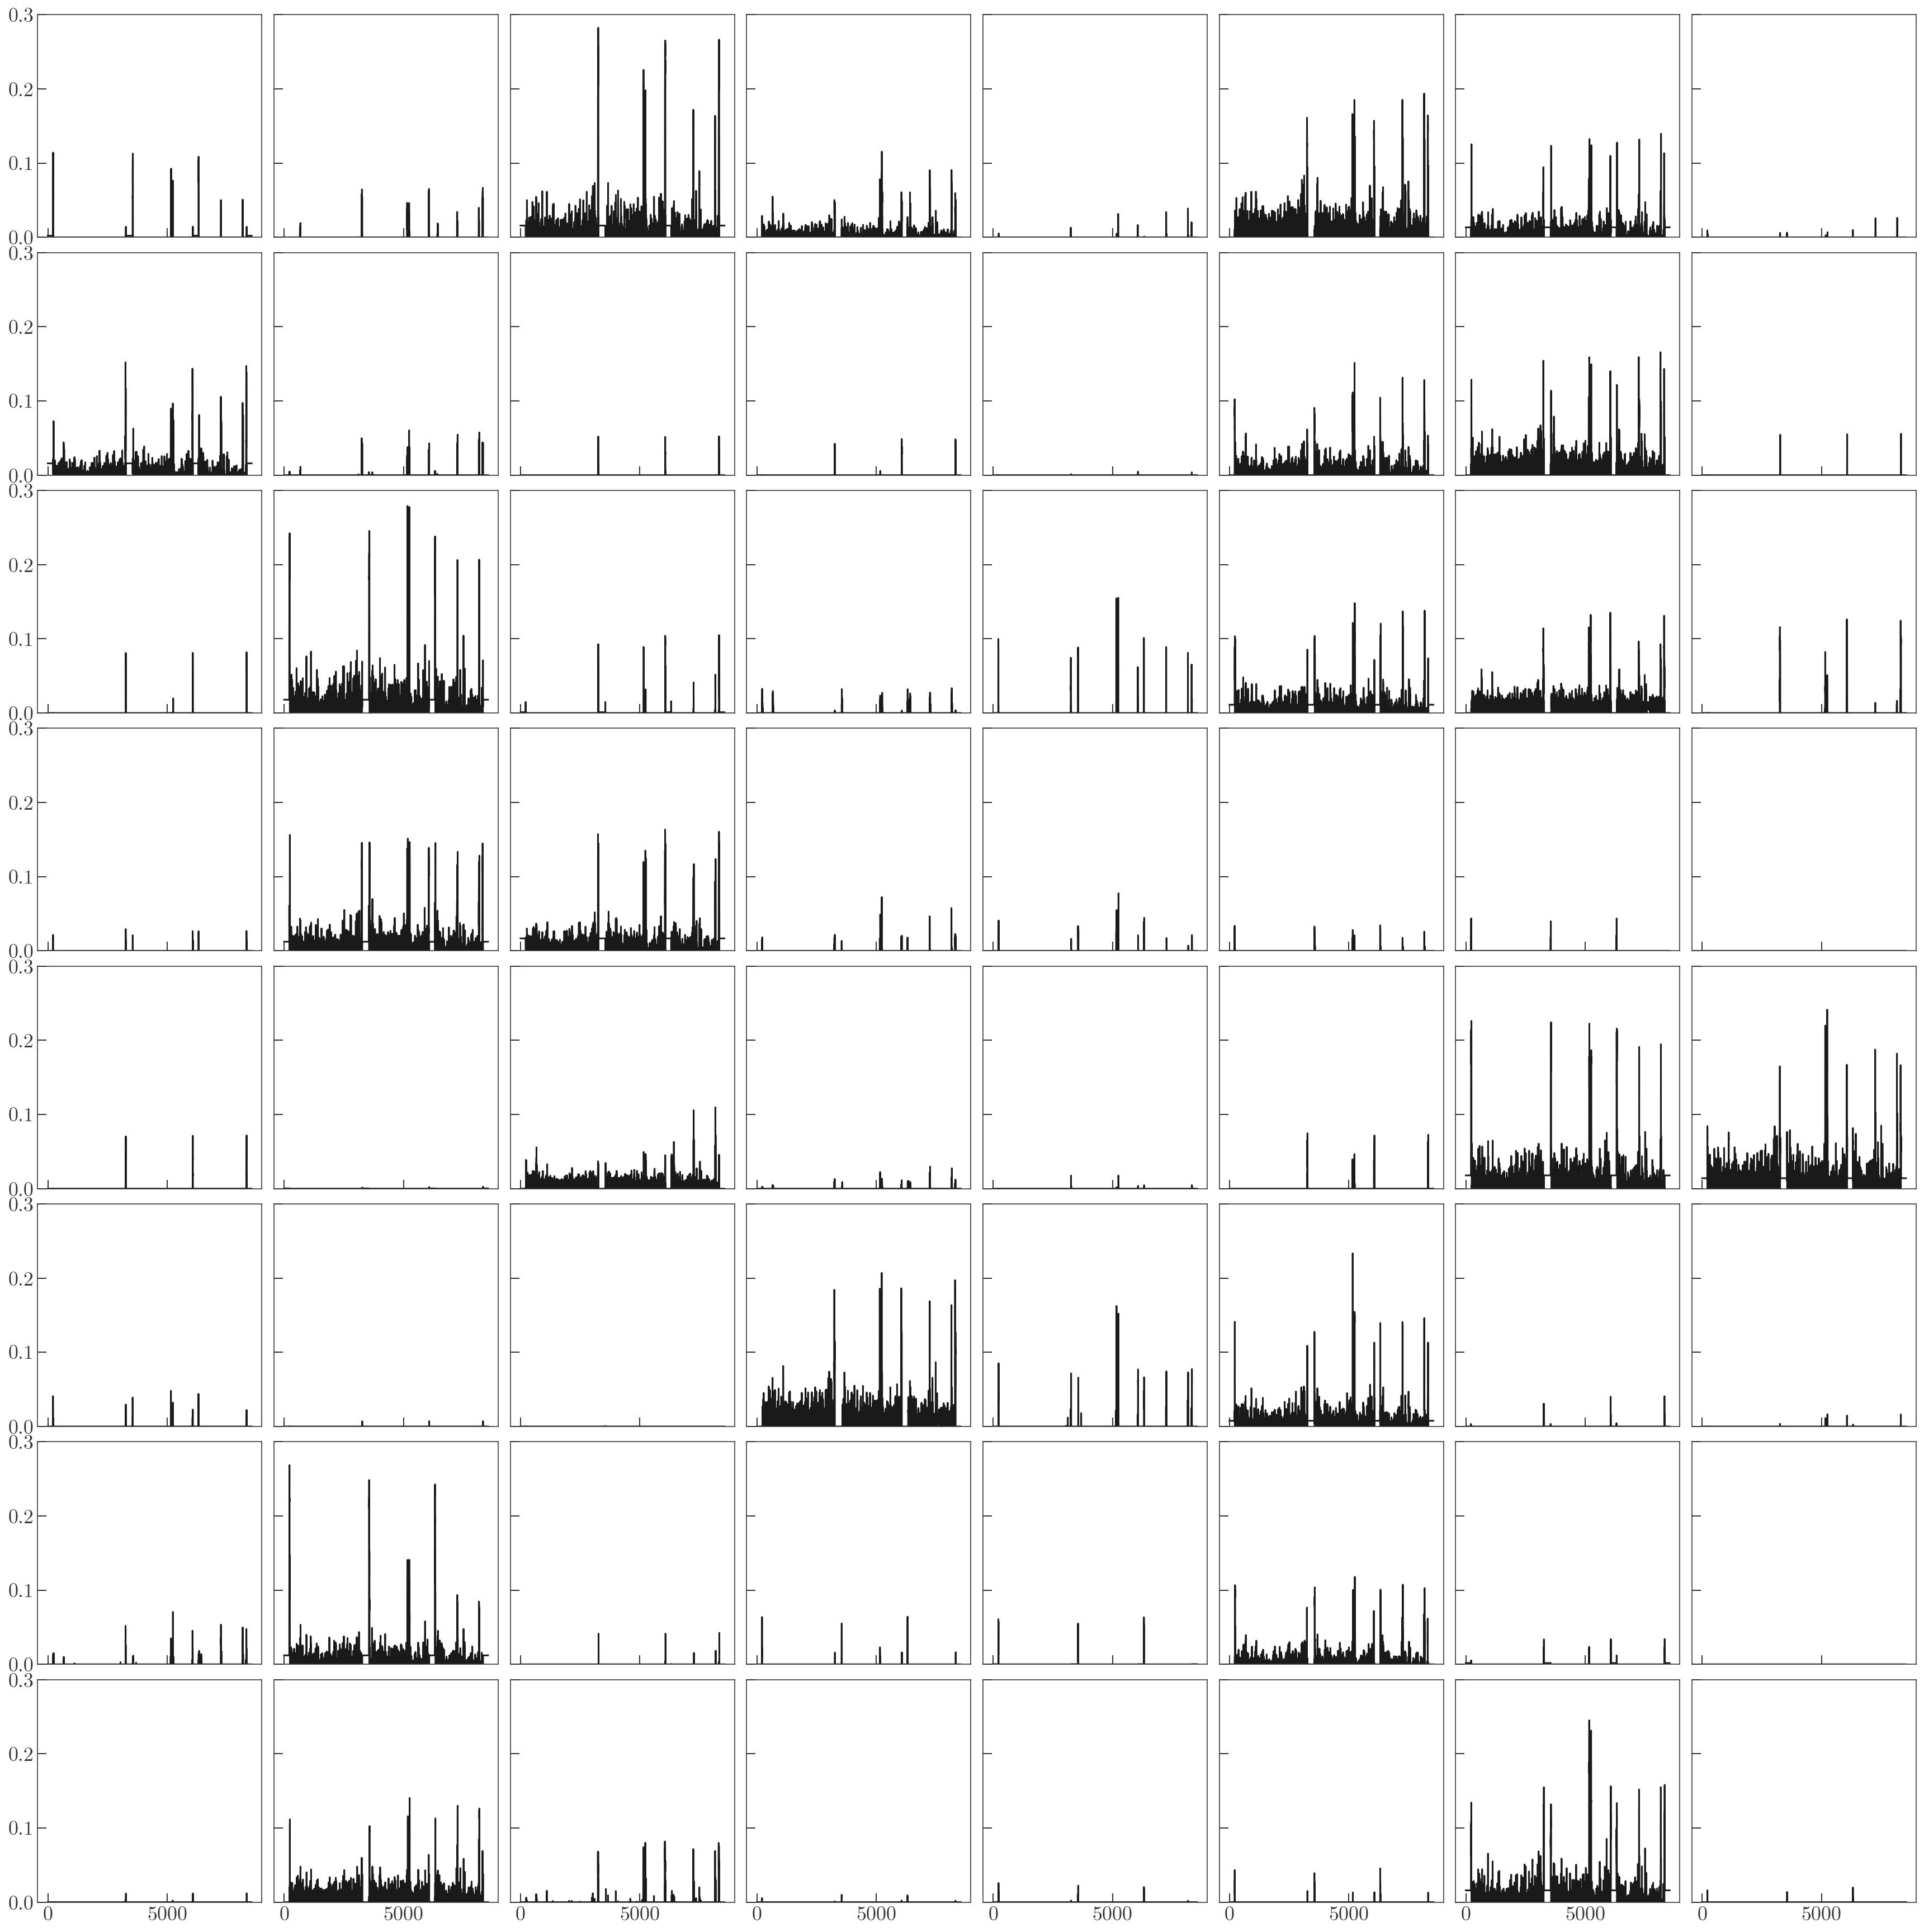

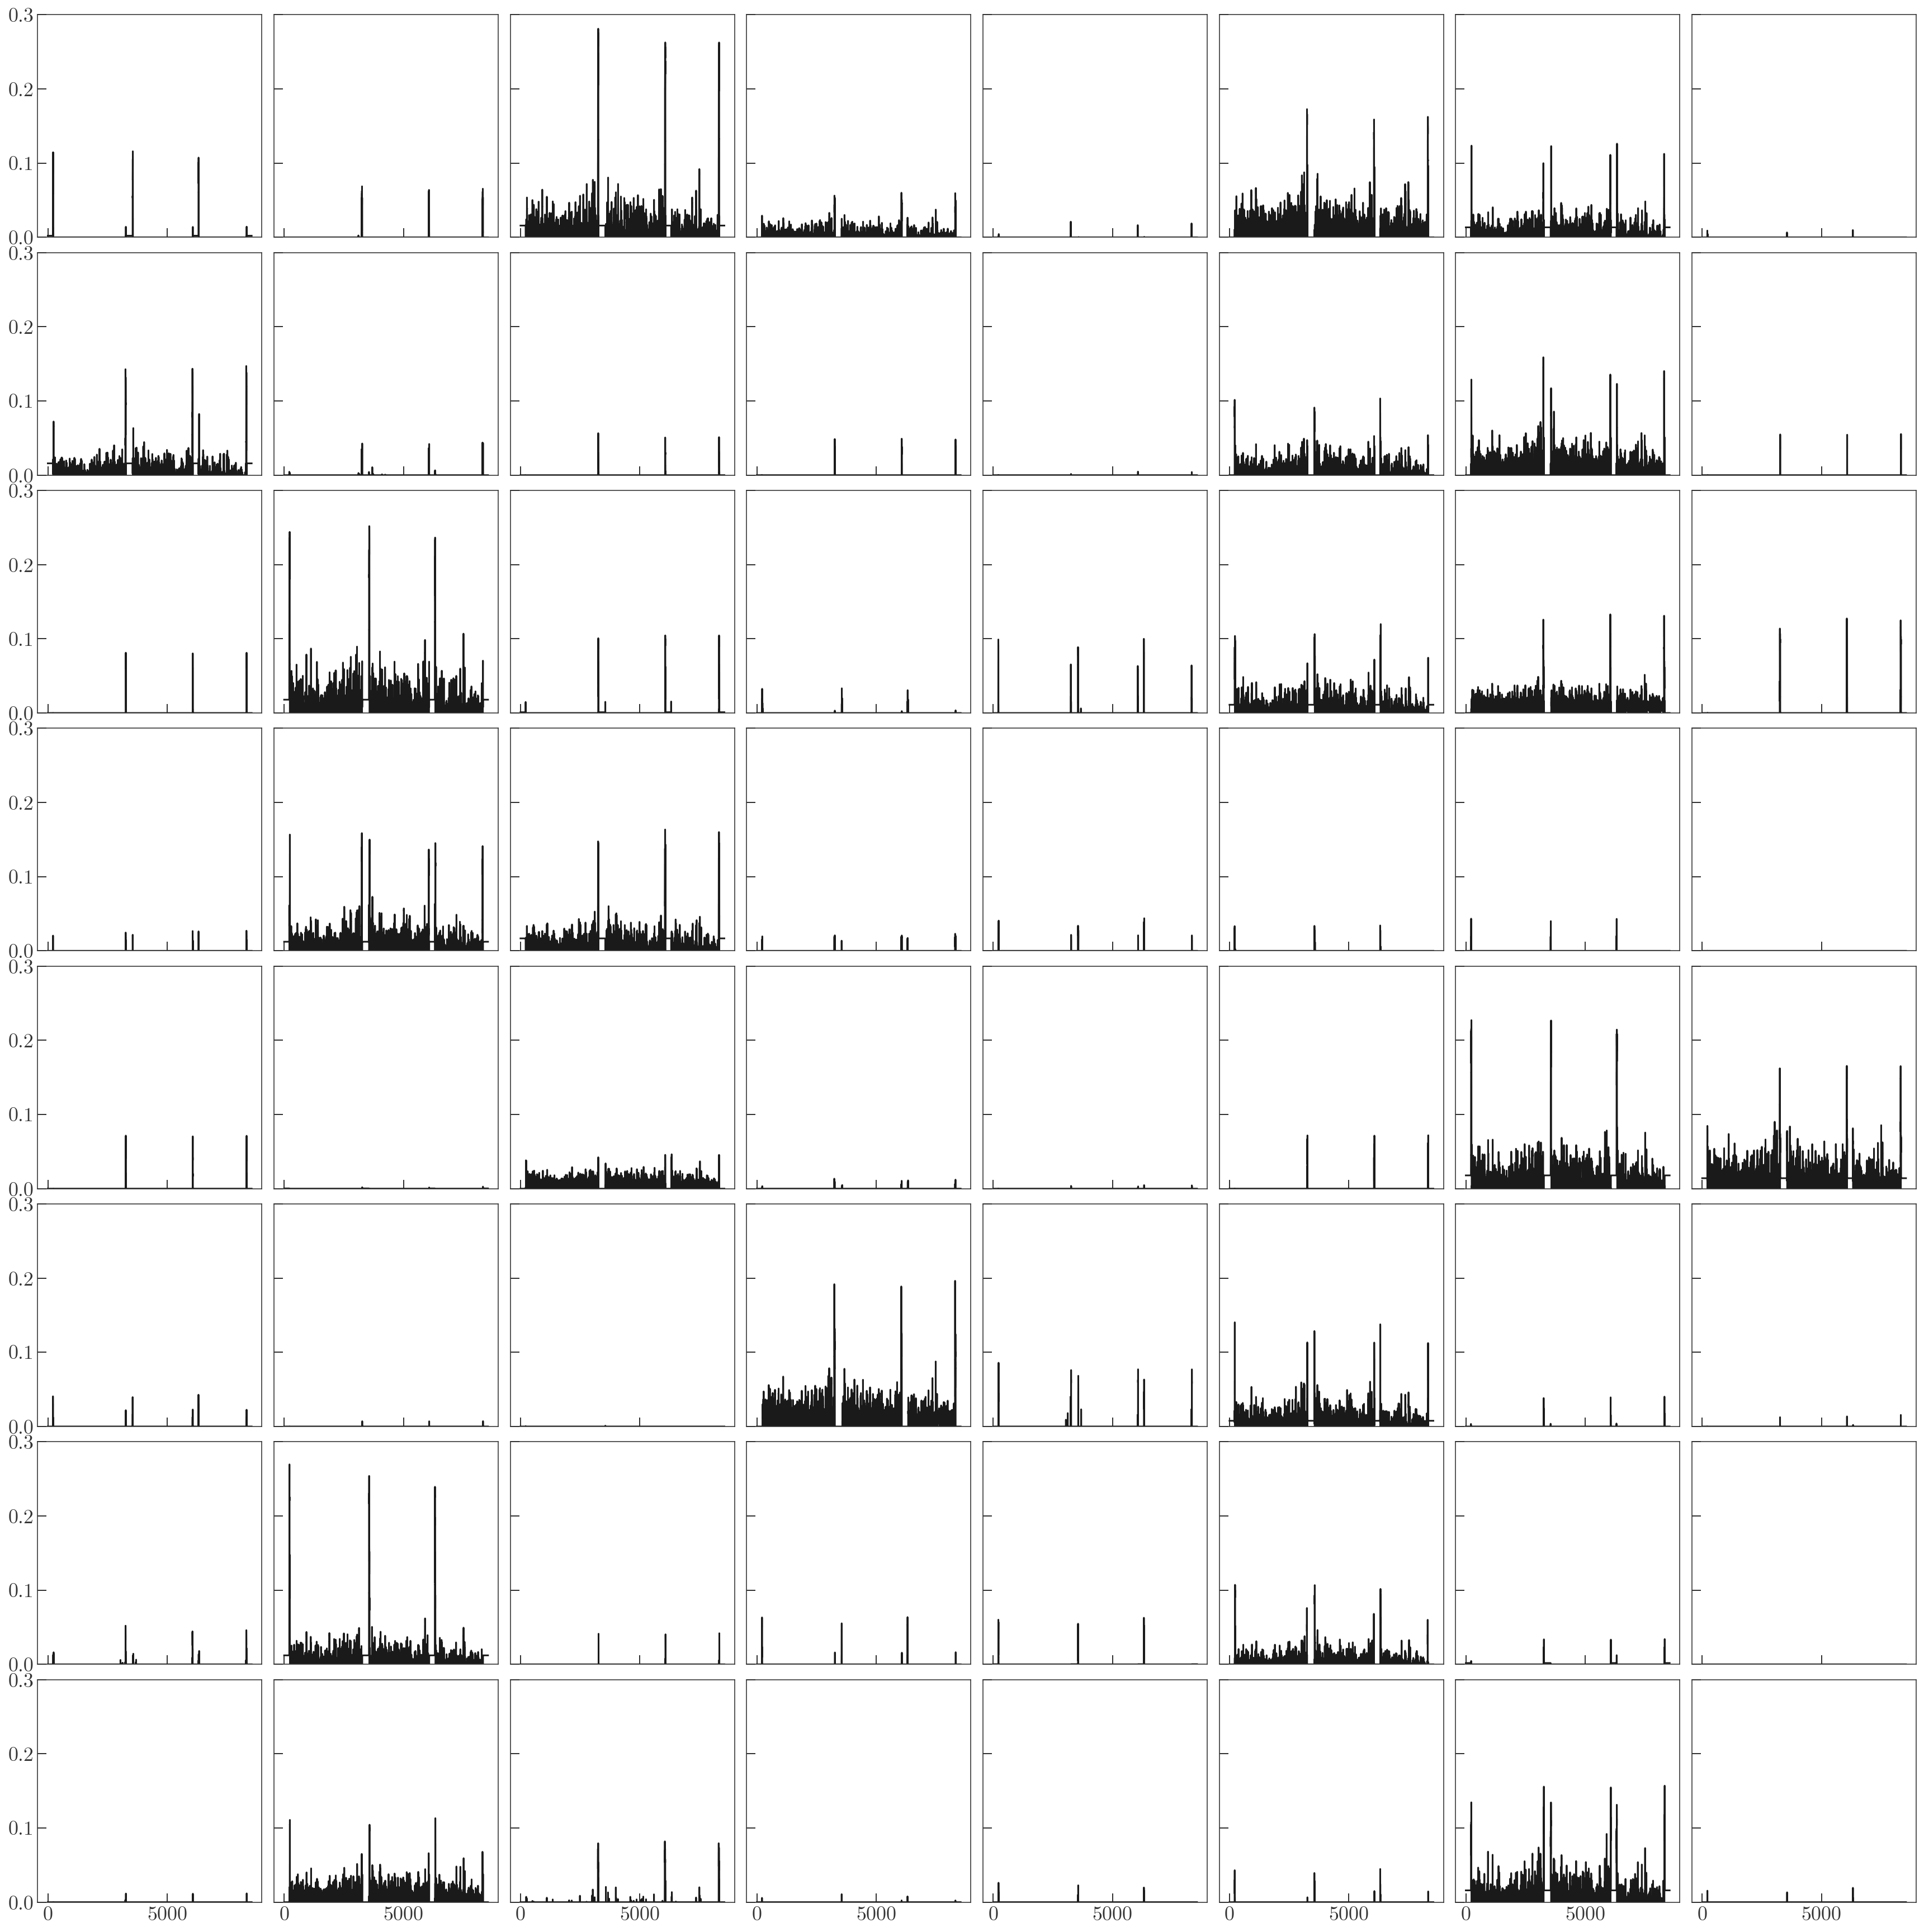

In [ ]:
for index in np.argsort(meta_tbl['Teff'])[::256]:
    C1 = convout1_f(X[index].reshape(1,-1,1).astype(np.float32))
    C1 = np.squeeze(C1)
    
    fig,axes = plt.subplots(8,8,figsize=(24,24), sharex=True, sharey=True)
    for i in range(64):
        axes.flat[i].plot(C1[:,i], marker='', drawstyle='steps-mid')

    fig.tight_layout()
    axes.flat[0].set_ylim(0,0.3)
    fig.savefig("../plots/Teff{}.png".format(int(meta_tbl['Teff'][index])))
    del fig

Now just look at the layers for fun...

In [20]:
for layer in model.layers:
    print(layer)
    for w in layer.get_weights():
        print(w.shape)

(32, 1, 1, 128)
(128,)
(16, 1, 128, 128)
(128,)
(8, 1, 128, 128)
(128,)
(128, 96)
(96,)
(96, 1)
(1,)


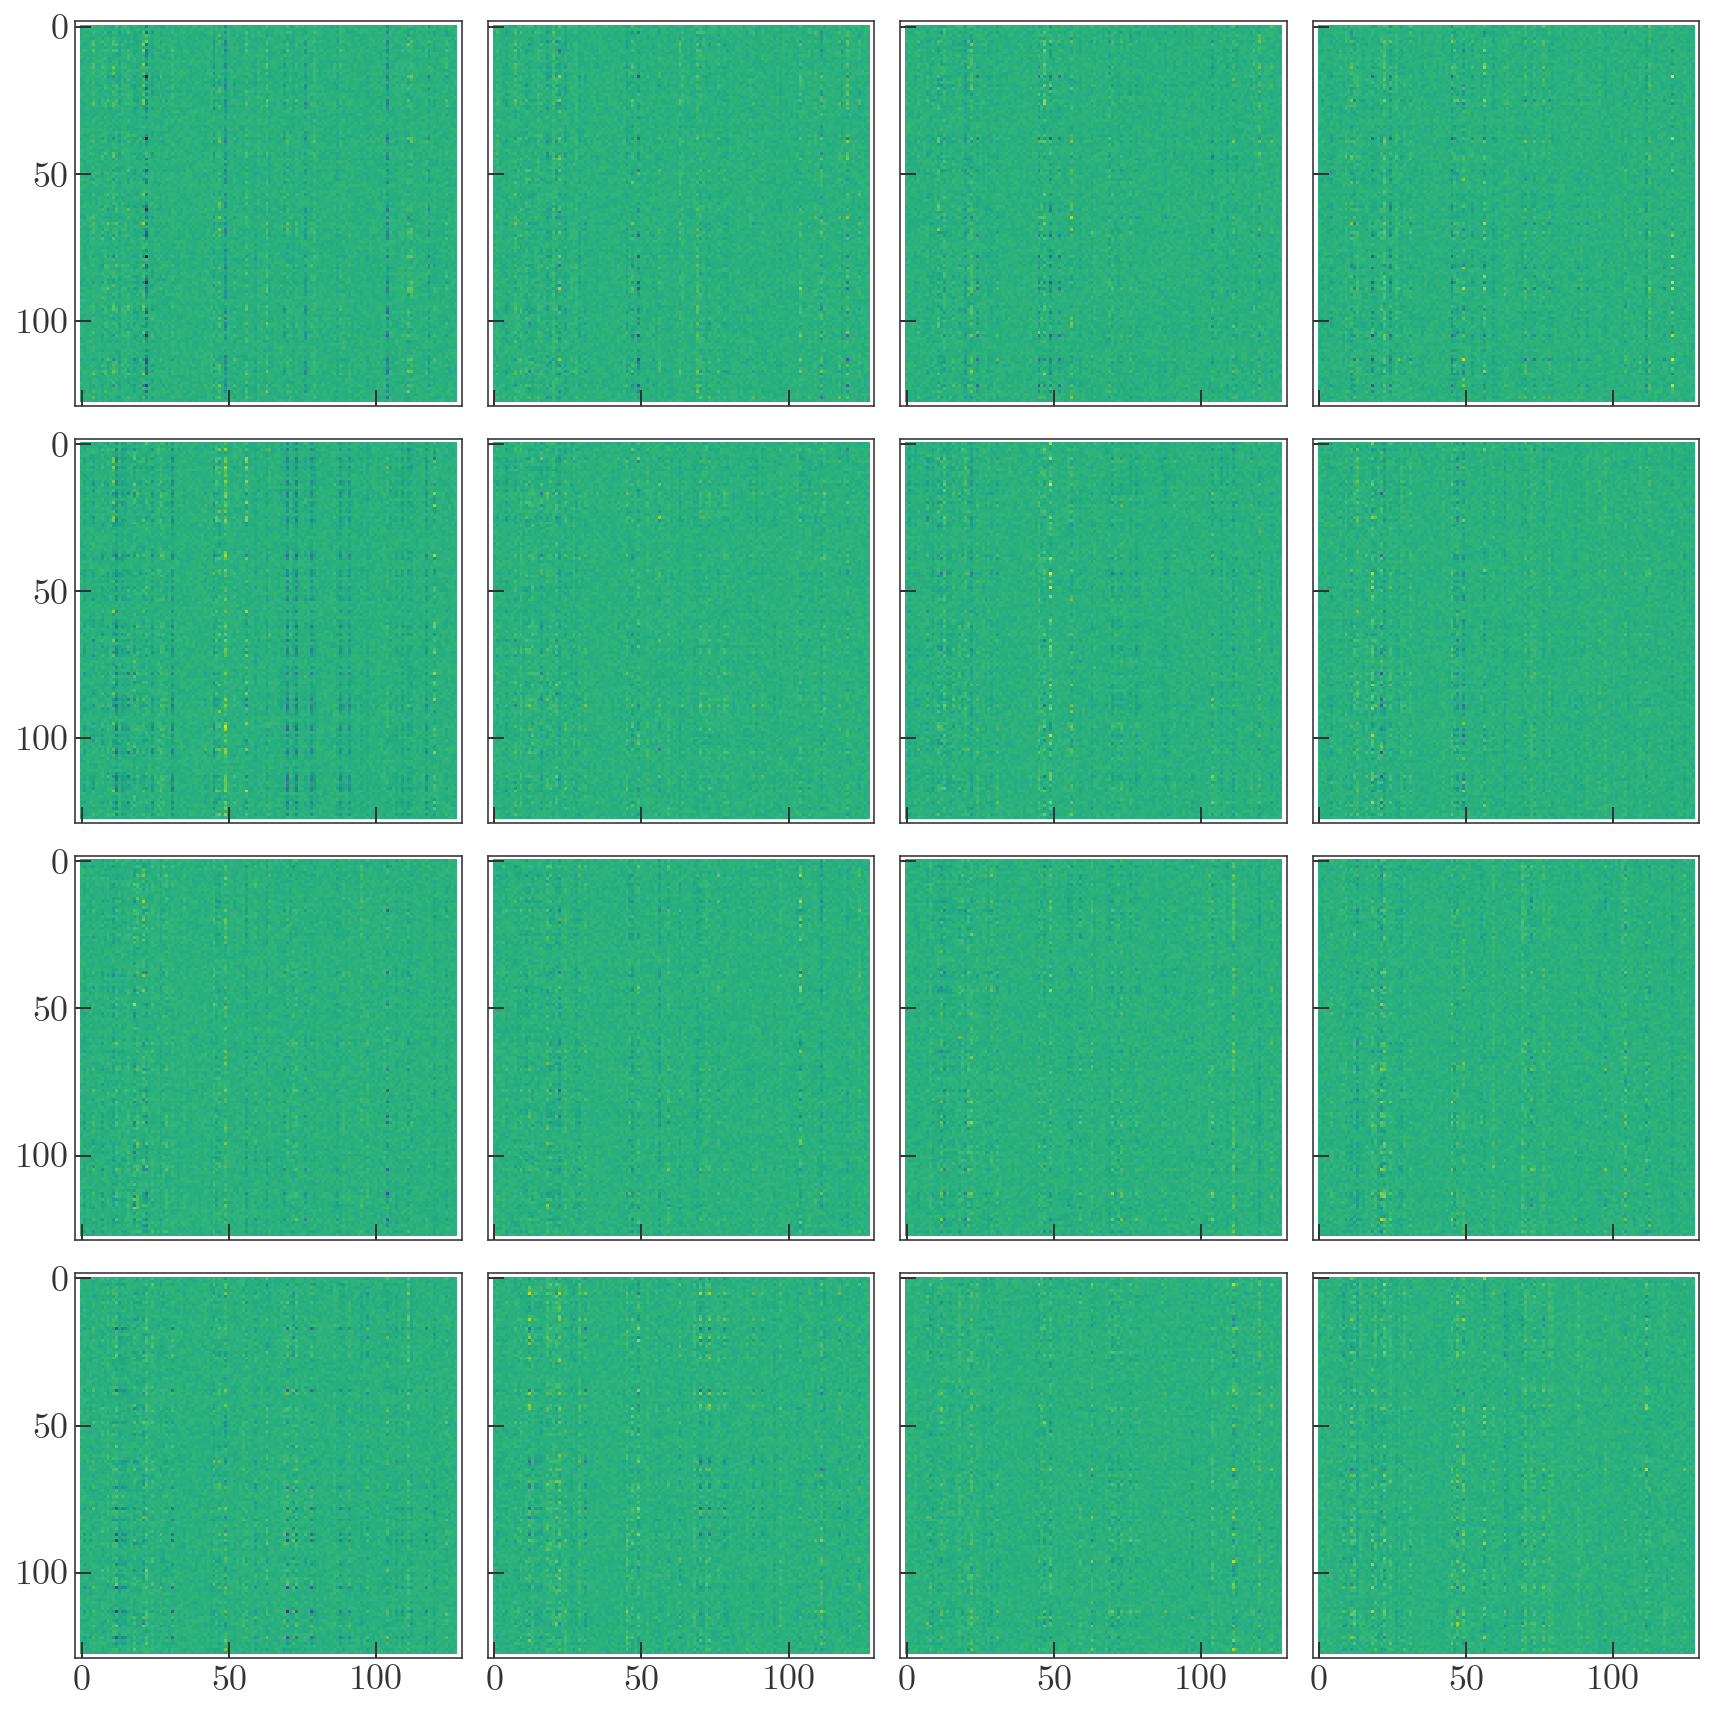

In [25]:
w = model.layers[3].get_weights()[0]

fig,axes = plt.subplots(4, 4, figsize=(12,12), sharex=True, sharey=True)
for i in range(16):
    axes.flat[i].imshow(w[i,0], vmin=w.min(), vmax=w.max())
    
fig.tight_layout()

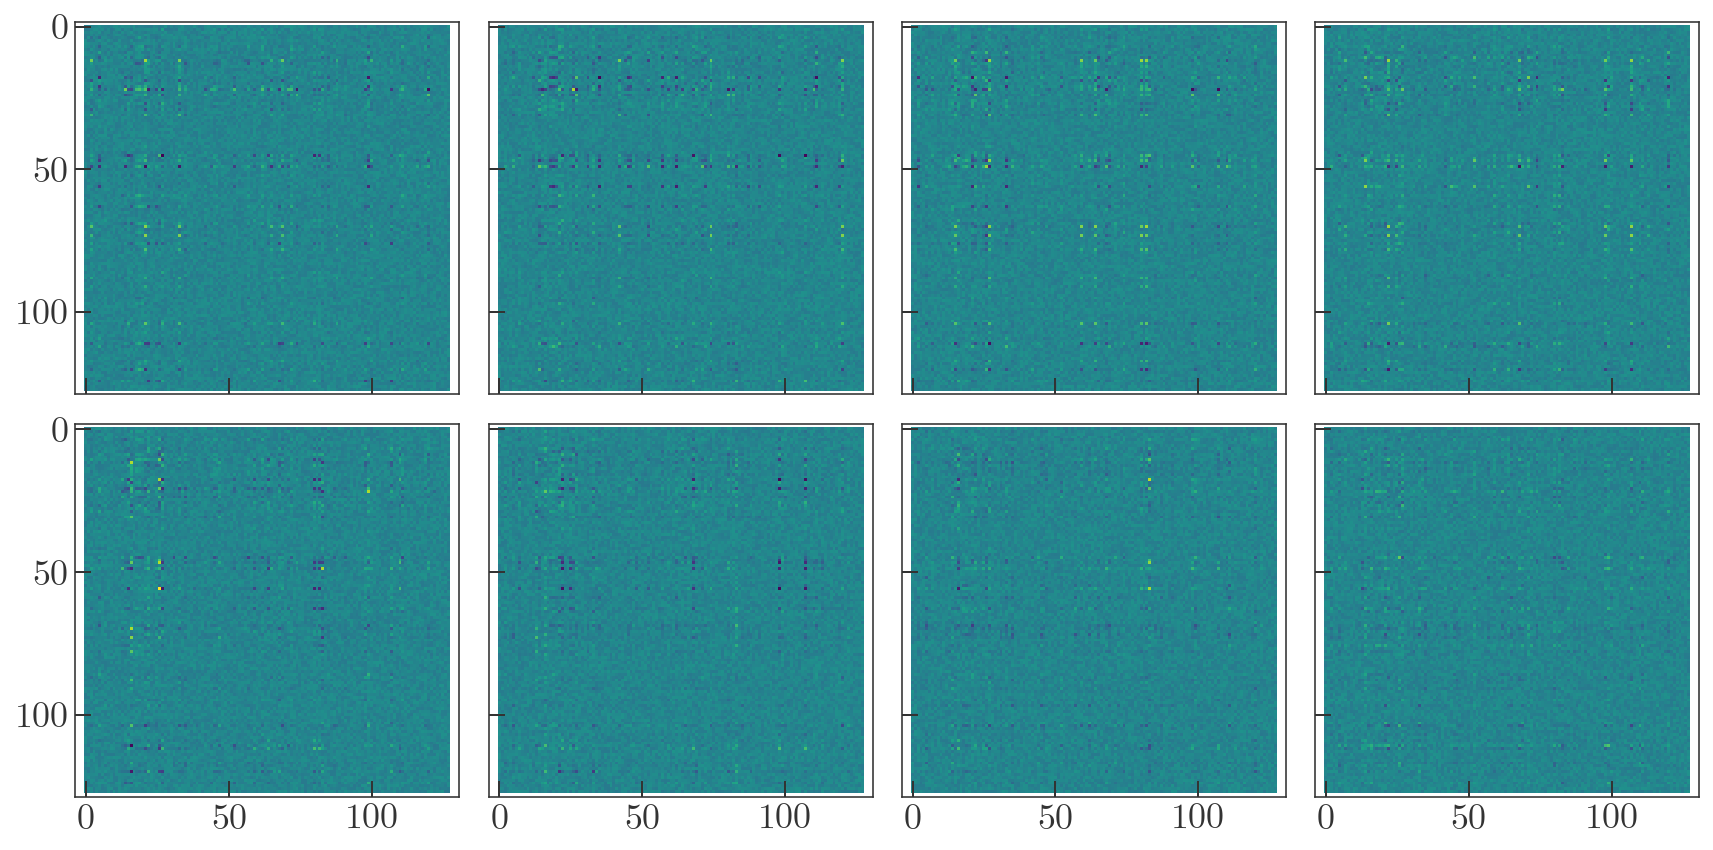

In [32]:
w = model.layers[6].get_weights()[0]

fig,axes = plt.subplots(2, 4, figsize=(12,6), sharex=True, sharey=True)
for i in range(8):
    axes.flat[i].imshow(w[i,0], vmin=w.min(), vmax=w.max())
    
fig.tight_layout()

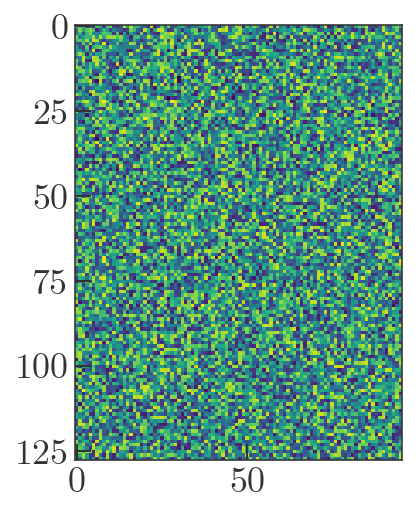

In [33]:
w = model.layers[9].get_weights()[0]
plt.imshow(w)